![Parkinson's Disease Analysis](parkinson_analysis.jpeg)

## Import library

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

import warnings as wn
wn.filterwarnings(action='ignore')

## Data import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//Disease_pre//parkinsons//parkinsons.csv")
pd.set_option("display.max_columns", None)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


## Data Cleaning

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['name', 'mdvp:fo(hz)', 'mdvp:fhi(hz)', 'mdvp:flo(hz)', 'mdvp:jitter(%)',
       'mdvp:jitter(abs)', 'mdvp:rap', 'mdvp:ppq', 'jitter:ddp',
       'mdvp:shimmer', 'mdvp:shimmer(db)', 'shimmer:apq3', 'shimmer:apq5',
       'mdvp:apq', 'shimmer:dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa',
       'spread1', 'spread2', 'd2', 'ppe'],
      dtype='object')

In [5]:
df.drop("name", axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mdvp:fo(hz)       195 non-null    float64
 1   mdvp:fhi(hz)      195 non-null    float64
 2   mdvp:flo(hz)      195 non-null    float64
 3   mdvp:jitter(%)    195 non-null    float64
 4   mdvp:jitter(abs)  195 non-null    float64
 5   mdvp:rap          195 non-null    float64
 6   mdvp:ppq          195 non-null    float64
 7   jitter:ddp        195 non-null    float64
 8   mdvp:shimmer      195 non-null    float64
 9   mdvp:shimmer(db)  195 non-null    float64
 10  shimmer:apq3      195 non-null    float64
 11  shimmer:apq5      195 non-null    float64
 12  mdvp:apq          195 non-null    float64
 13  shimmer:dda       195 non-null    float64
 14  nhr               195 non-null    float64
 15  hnr               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [7]:
df.shape

(195, 23)

In [8]:
df.isnull().sum()

mdvp:fo(hz)         0
mdvp:fhi(hz)        0
mdvp:flo(hz)        0
mdvp:jitter(%)      0
mdvp:jitter(abs)    0
mdvp:rap            0
mdvp:ppq            0
jitter:ddp          0
mdvp:shimmer        0
mdvp:shimmer(db)    0
shimmer:apq3        0
shimmer:apq5        0
mdvp:apq            0
shimmer:dda         0
nhr                 0
hnr                 0
status              0
rpde                0
dfa                 0
spread1             0
spread2             0
d2                  0
ppe                 0
dtype: int64

In [9]:
df.describe(include="all")

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:jitter(abs),mdvp:rap,mdvp:ppq,jitter:ddp,mdvp:shimmer,mdvp:shimmer(db),shimmer:apq3,shimmer:apq5,mdvp:apq,shimmer:dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
assert pd.notnull(df).all().all()

In [11]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

## EDA

In [12]:
print(df["status"].value_counts())  ## imbalanced data so go for precision, recall and f1 score

status
1    147
0     48
Name: count, dtype: int64


Text(0.5, 1.0, 'Parkinson’s Disease-classification')

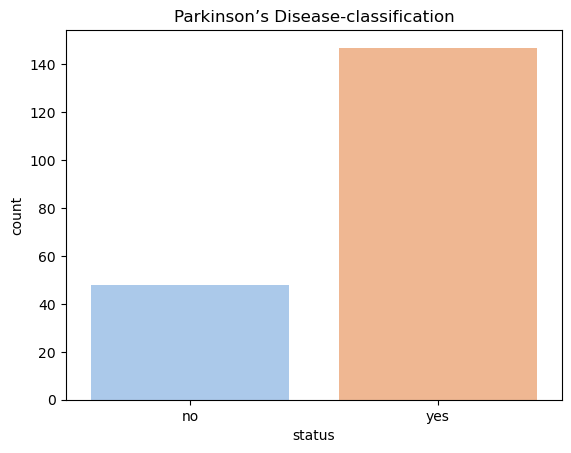

In [13]:
ax = sns.countplot(data=df, x="status", palette="pastel")
ax.set_xticklabels(["no", "yes"])
plt.title("Parkinson’s Disease-classification")

### Univariate analysis

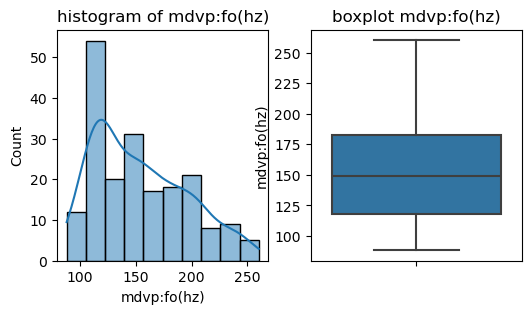

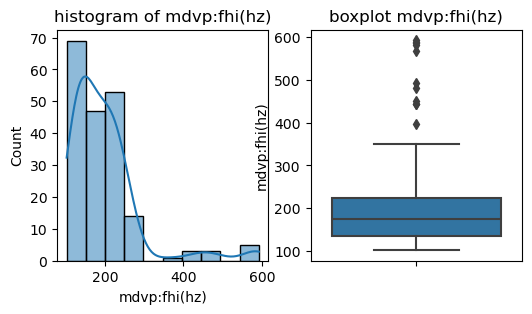

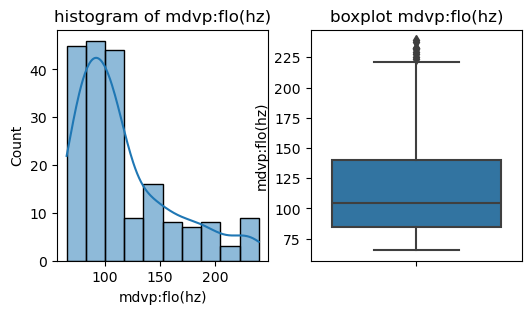

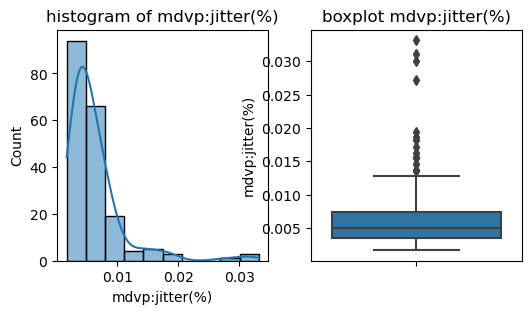

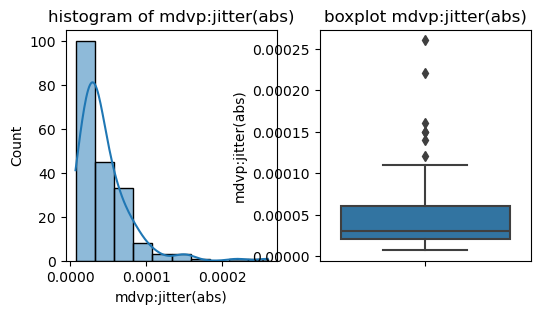

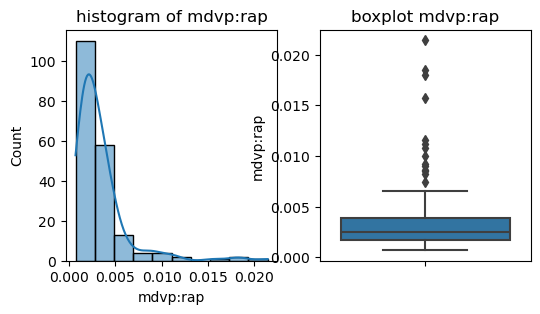

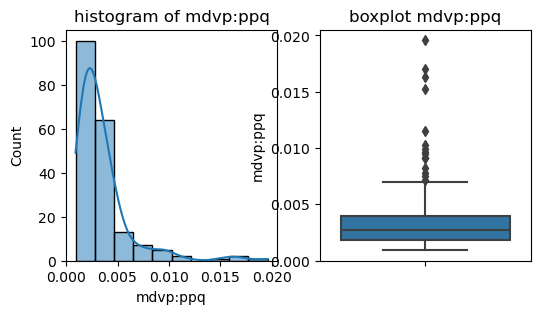

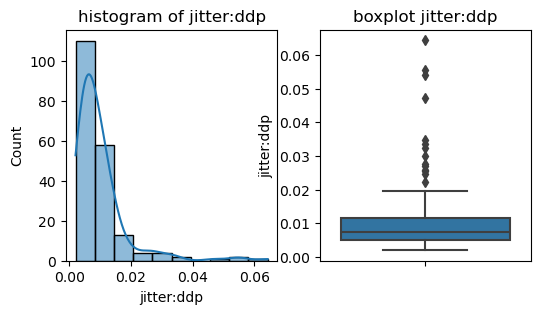

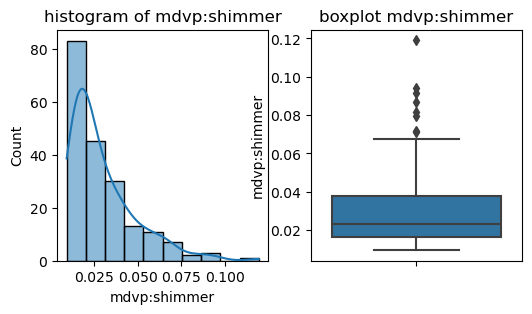

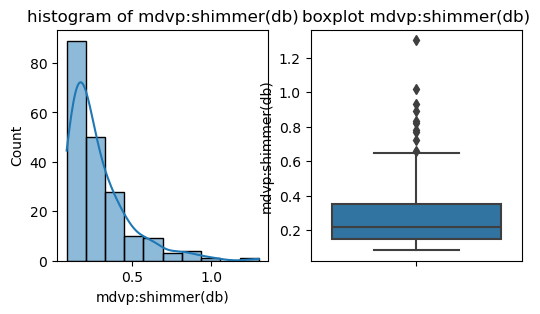

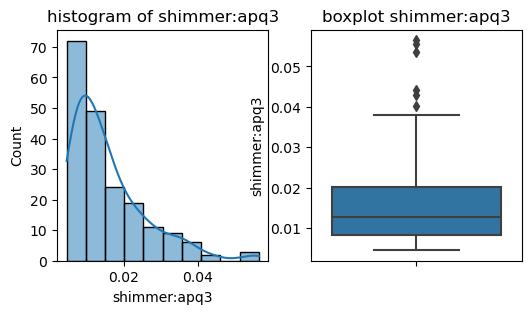

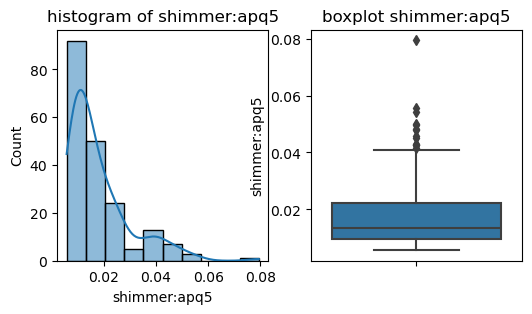

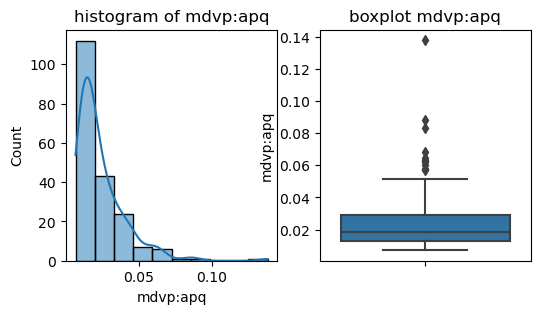

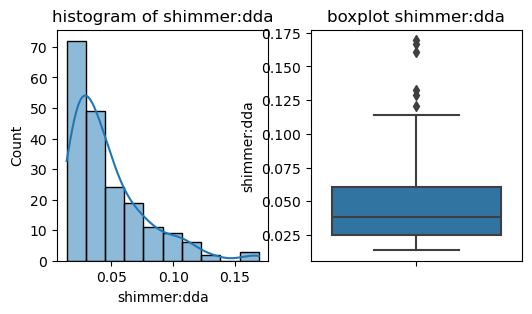

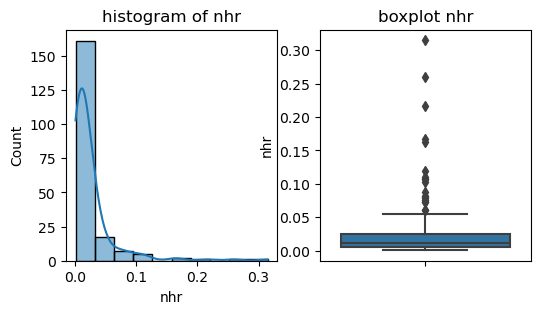

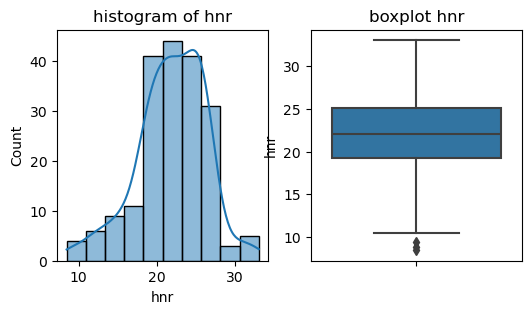

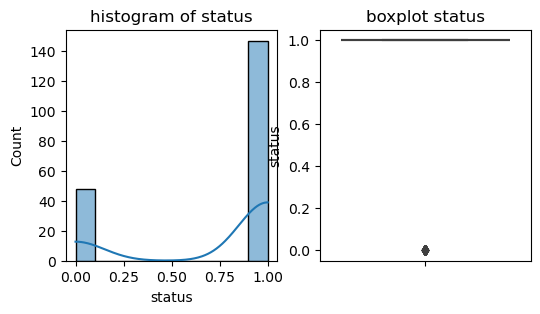

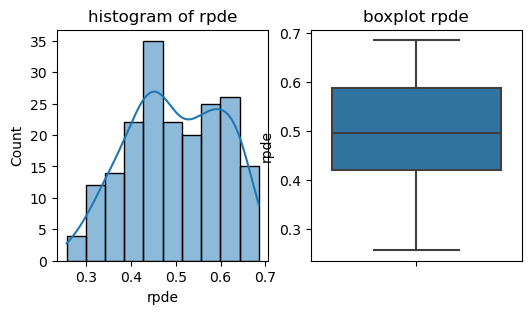

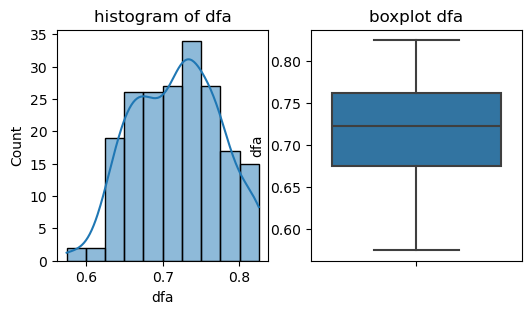

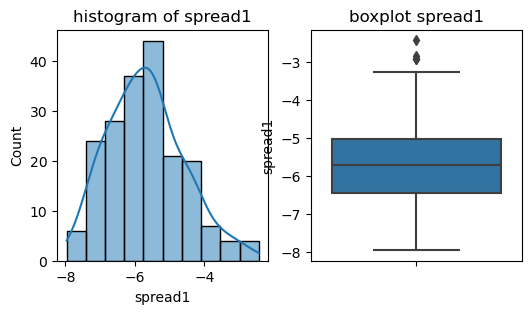

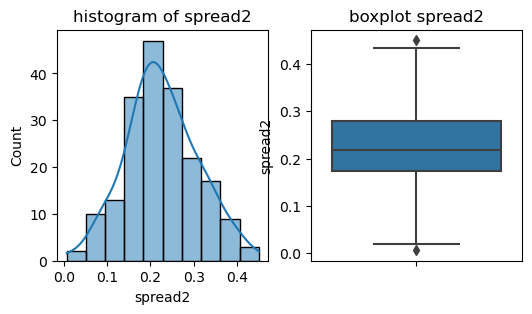

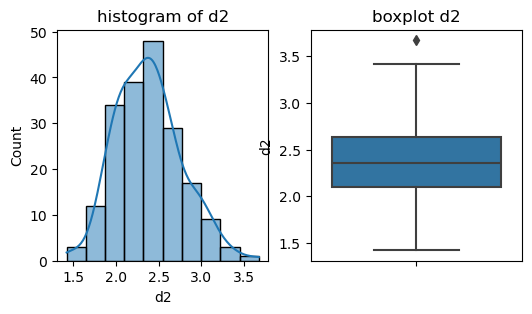

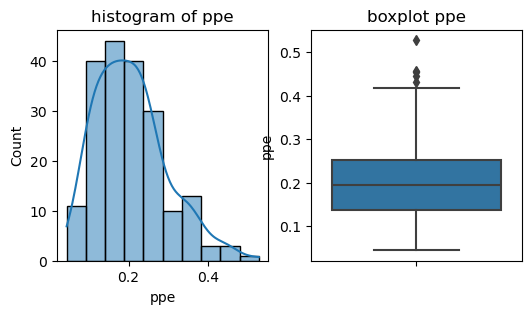

In [14]:
num_features=df

for col in num_features:
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()
    

### Bivariate analysis

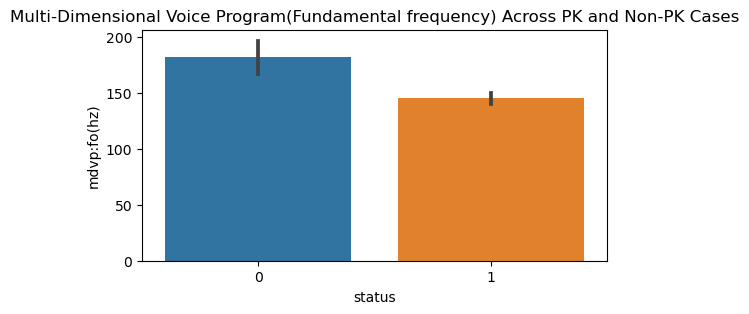

In [15]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:fo(hz)', data=df)
plt.title('Multi-Dimensional Voice Program(Fundamental frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:fo(hz)')
plt.show()

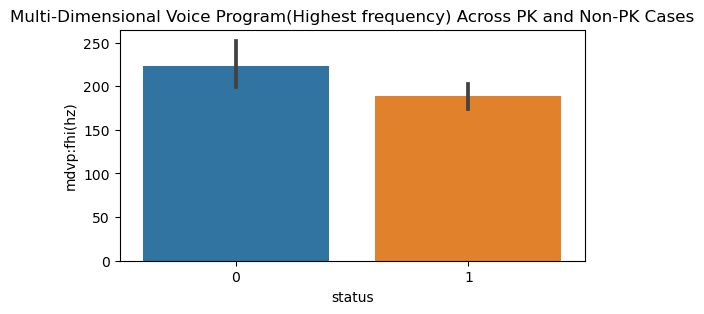

In [16]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:fhi(hz)', data=df)
plt.title('Multi-Dimensional Voice Program(Highest frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:fhi(hz)')
plt.show()

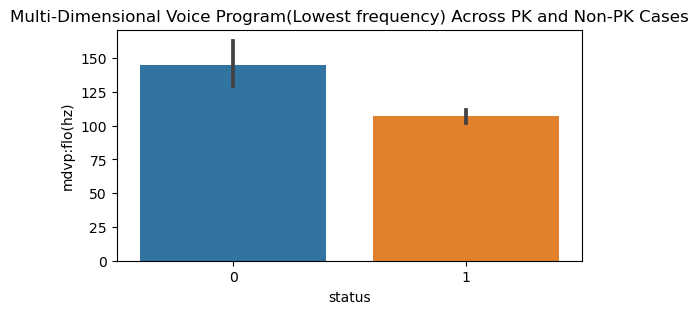

In [17]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:flo(hz)', data=df)
plt.title('Multi-Dimensional Voice Program(Lowest frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:flo(hz)')
plt.show()

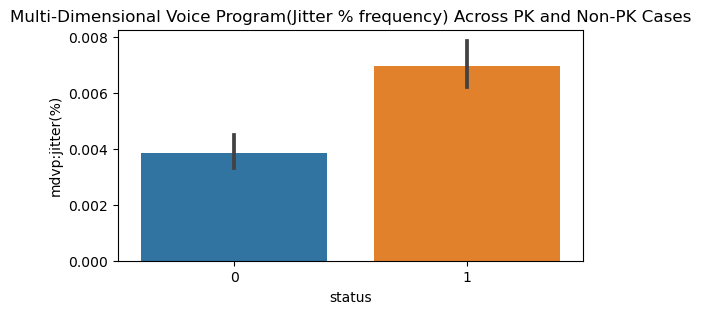

In [18]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:jitter(%)', data=df)
plt.title('Multi-Dimensional Voice Program(Jitter % frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:jitter(%)')
plt.show()

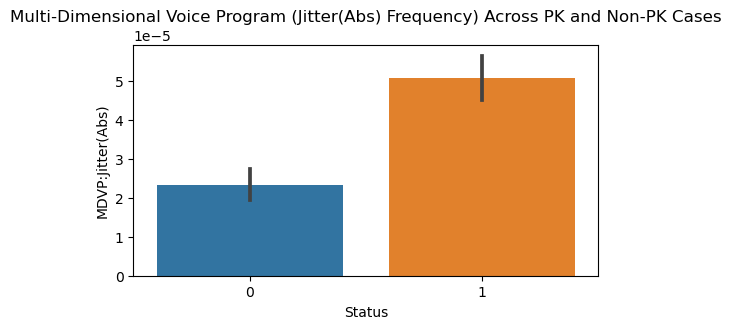

In [19]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:jitter(abs)', data=df)
plt.title('Multi-Dimensional Voice Program (Jitter(Abs) Frequency) Across PK and Non-PK Cases')
plt.xlabel('Status')
plt.ylabel('MDVP:Jitter(Abs)')
plt.show()

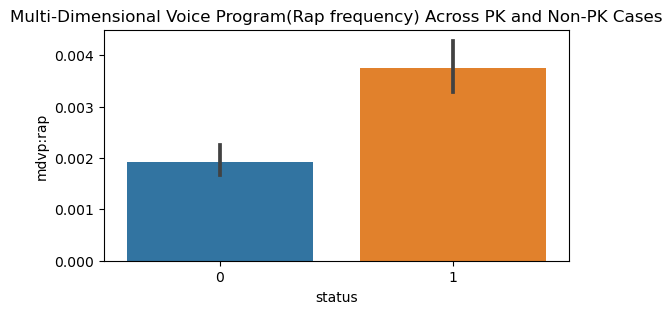

In [20]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:rap', data=df)
plt.title('Multi-Dimensional Voice Program(Rap frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:rap')
plt.show()

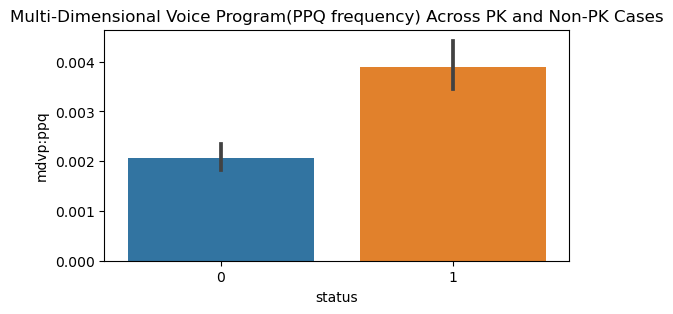

In [21]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:ppq', data=df)
plt.title('Multi-Dimensional Voice Program(PPQ frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:ppq')
plt.show()

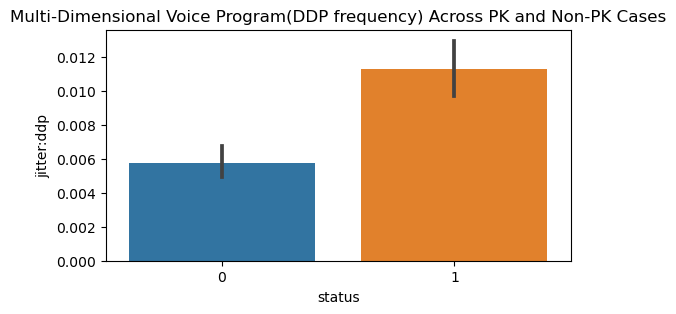

In [22]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='jitter:ddp', data=df)
plt.title('Multi-Dimensional Voice Program(DDP frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('jitter:ddp')
plt.show()

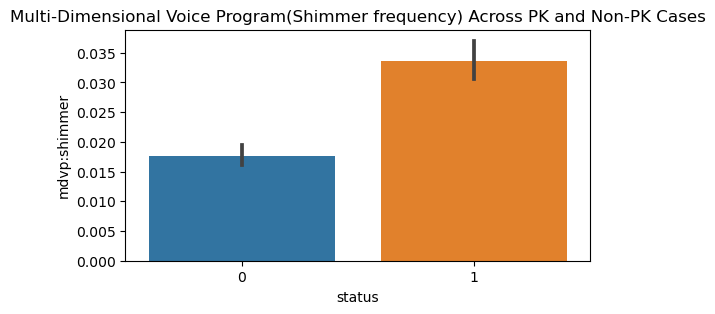

In [23]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:shimmer', data=df)
plt.title('Multi-Dimensional Voice Program(Shimmer frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:shimmer')
plt.show()

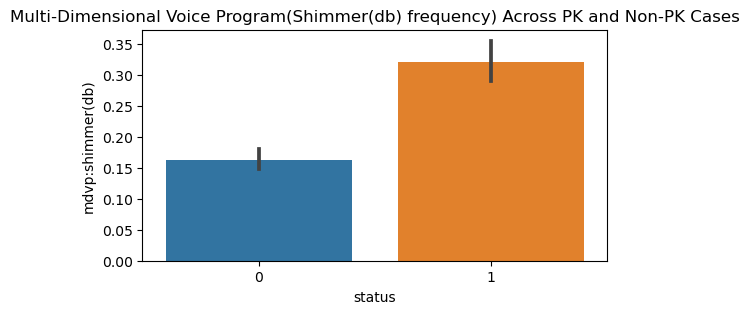

In [24]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:shimmer(db)', data=df)
plt.title('Multi-Dimensional Voice Program(Shimmer(db) frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:shimmer(db)')
plt.show()

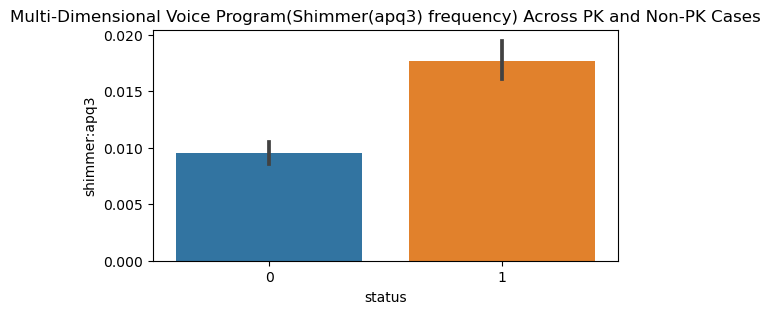

In [25]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='shimmer:apq3', data=df)
plt.title('Multi-Dimensional Voice Program(Shimmer(apq3) frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('shimmer:apq3')
plt.show()

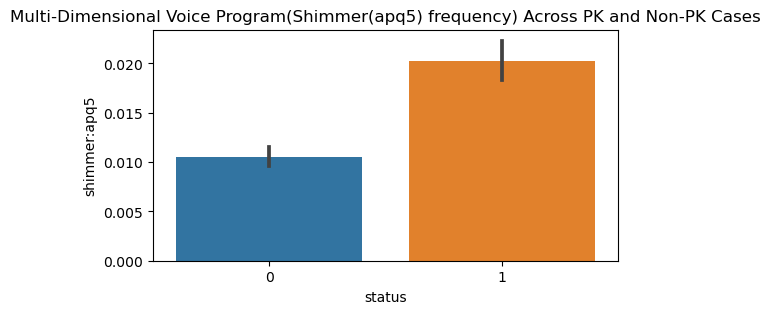

In [26]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='shimmer:apq5', data=df)
plt.title('Multi-Dimensional Voice Program(Shimmer(apq5) frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('shimmer:apq5')
plt.show()

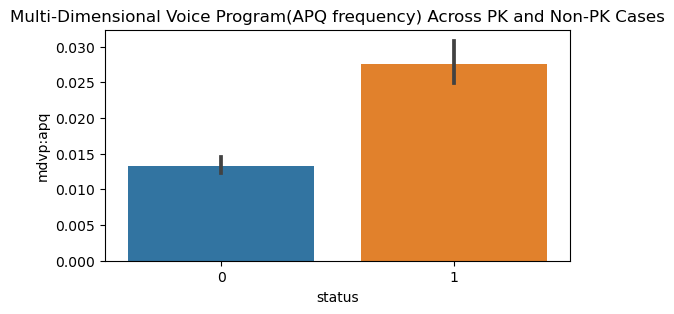

In [27]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='mdvp:apq', data=df)
plt.title('Multi-Dimensional Voice Program(APQ frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('mdvp:apq')
plt.show()

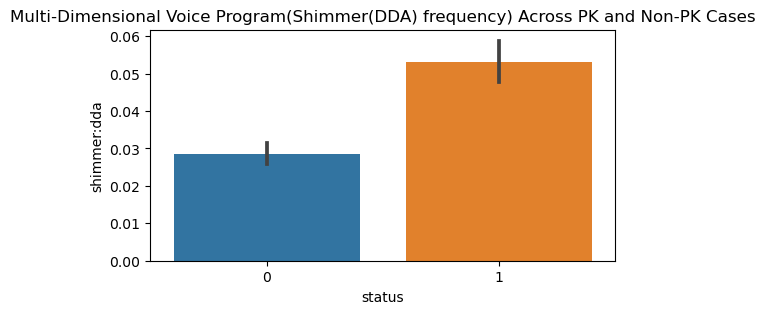

In [28]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='shimmer:dda', data=df)
plt.title('Multi-Dimensional Voice Program(Shimmer(DDA) frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('shimmer:dda')
plt.show()

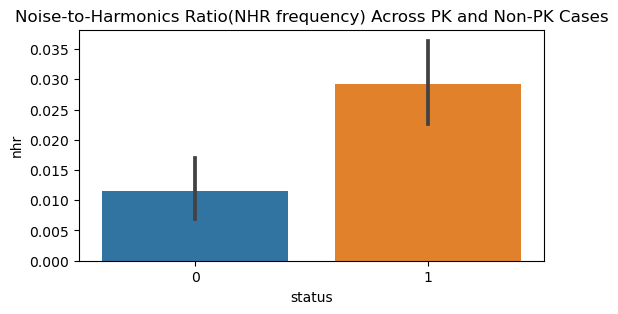

In [29]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='nhr', data=df)
plt.title('Noise-to-Harmonics Ratio(NHR frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('nhr')
plt.show()

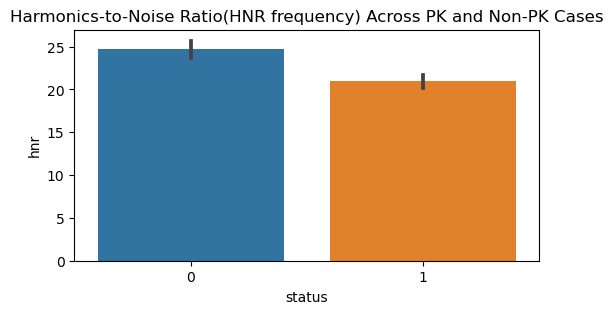

In [30]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='hnr', data=df)
plt.title('Harmonics-to-Noise Ratio(HNR frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('hnr')
plt.show()

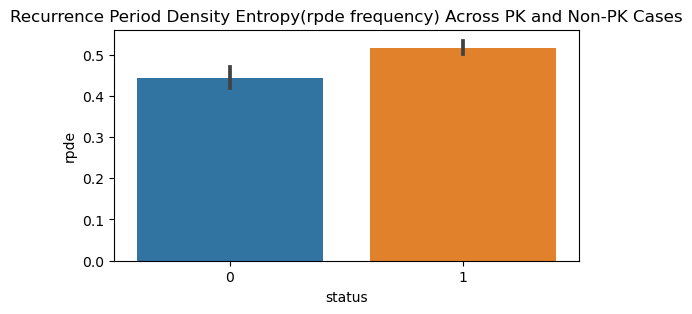

In [31]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='rpde', data=df)
plt.title('Recurrence Period Density Entropy(rpde frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('rpde')
plt.show()

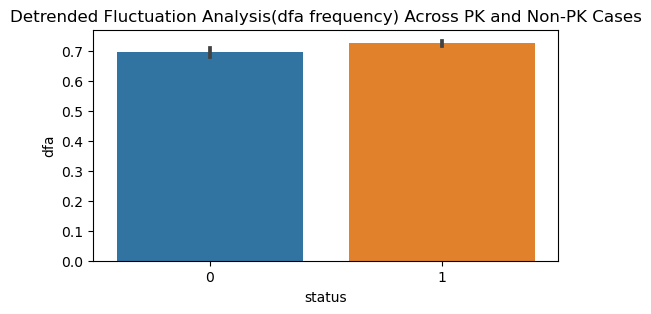

In [32]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='dfa', data=df)
plt.title('Detrended Fluctuation Analysis(dfa frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('dfa')
plt.show()

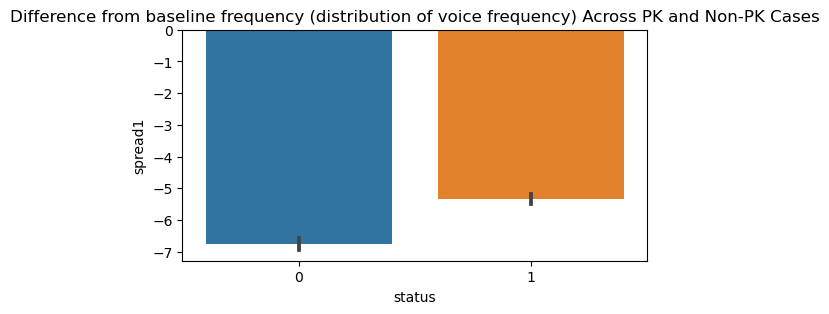

In [33]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='spread1', data=df)
plt.title('Difference from baseline frequency (distribution of voice frequency) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('spread1')
plt.show()

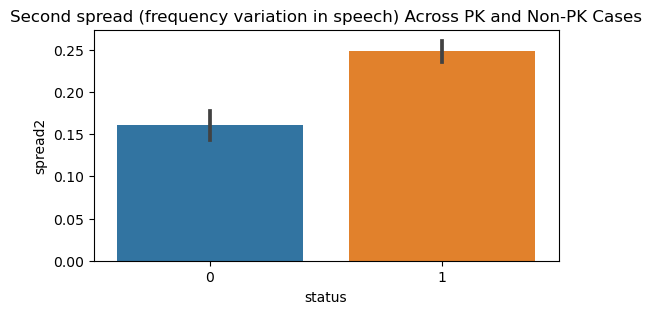

In [34]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='spread2', data=df)
plt.title('Second spread (frequency variation in speech) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('spread2')
plt.show()

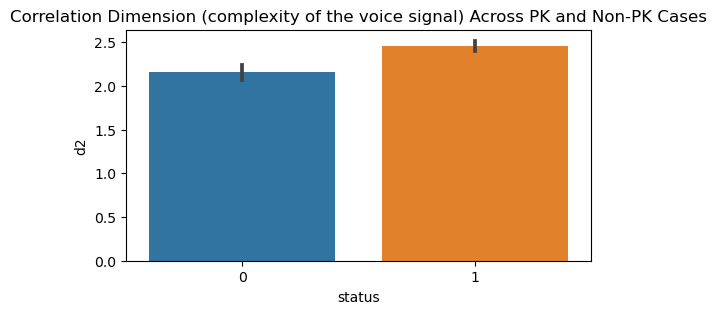

In [35]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='d2', data=df)
plt.title('Correlation Dimension (complexity of the voice signal) Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('d2')
plt.show()

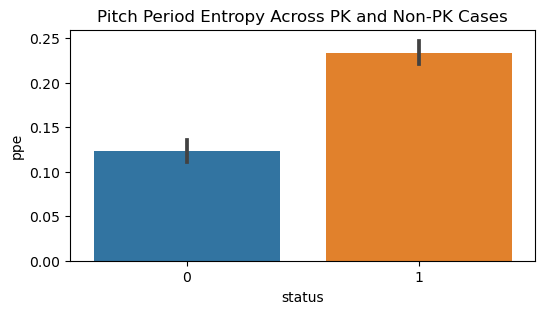

In [36]:
plt.figure(figsize=(6, 3))
sns.barplot(x='status', y='ppe', data=df)
plt.title('Pitch Period Entropy Across PK and Non-PK Cases')
plt.xlabel('status')
plt.ylabel('ppe')
plt.show()

## Feature selection & Multivariate Analysis

In [37]:
df.corr()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:jitter(abs),mdvp:rap,mdvp:ppq,jitter:ddp,mdvp:shimmer,mdvp:shimmer(db),shimmer:apq3,shimmer:apq5,mdvp:apq,shimmer:dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
mdvp:fo(hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
mdvp:fhi(hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
mdvp:flo(hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
mdvp:jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
mdvp:jitter(abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
mdvp:rap,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
mdvp:ppq,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
jitter:ddp,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
mdvp:shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
mdvp:shimmer(db),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [38]:
print(df.corr()['status'].abs().sort_values(ascending=False))

status              1.000000
spread1             0.564838
ppe                 0.531039
spread2             0.454842
mdvp:fo(hz)         0.383535
mdvp:flo(hz)        0.380200
mdvp:shimmer        0.367430
mdvp:apq            0.364316
hnr                 0.361515
shimmer:apq5        0.351148
mdvp:shimmer(db)    0.350697
shimmer:apq3        0.347617
shimmer:dda         0.347608
d2                  0.340232
mdvp:jitter(abs)    0.338653
rpde                0.308567
mdvp:ppq            0.288698
mdvp:jitter(%)      0.278220
mdvp:rap            0.266668
jitter:ddp          0.266646
dfa                 0.231739
nhr                 0.189429
mdvp:fhi(hz)        0.166136
Name: status, dtype: float64


<Axes: >

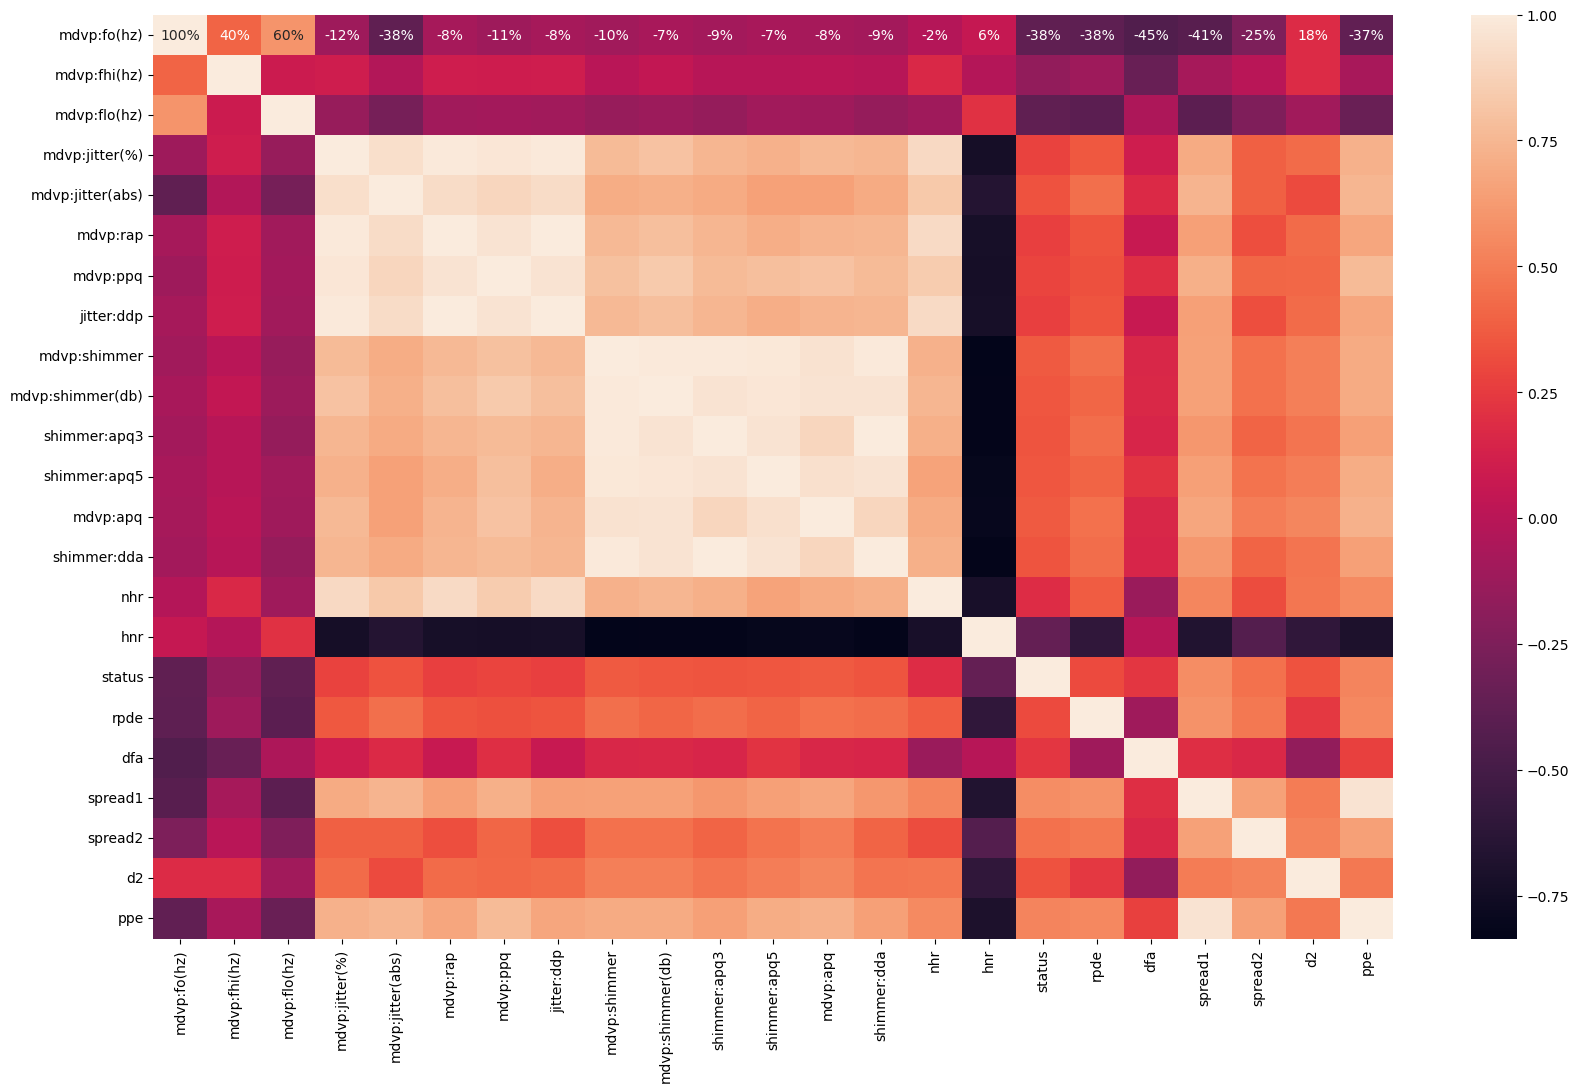

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [40]:
df=df.drop(columns=["mdvp:jitter(abs)","mdvp:rap","mdvp:ppq","jitter:ddp","mdvp:shimmer(db)","nhr","ppe","shimmer:apq3","shimmer:apq5","mdvp:apq","shimmer:dda"])
df.head()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:shimmer,hnr,status,rpde,dfa,spread1,spread2,d2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [41]:
df.tail()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:shimmer,hnr,status,rpde,dfa,spread1,spread2,d2
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608
194,214.289,260.277,77.973,0.00567,0.01884,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477


<Axes: >

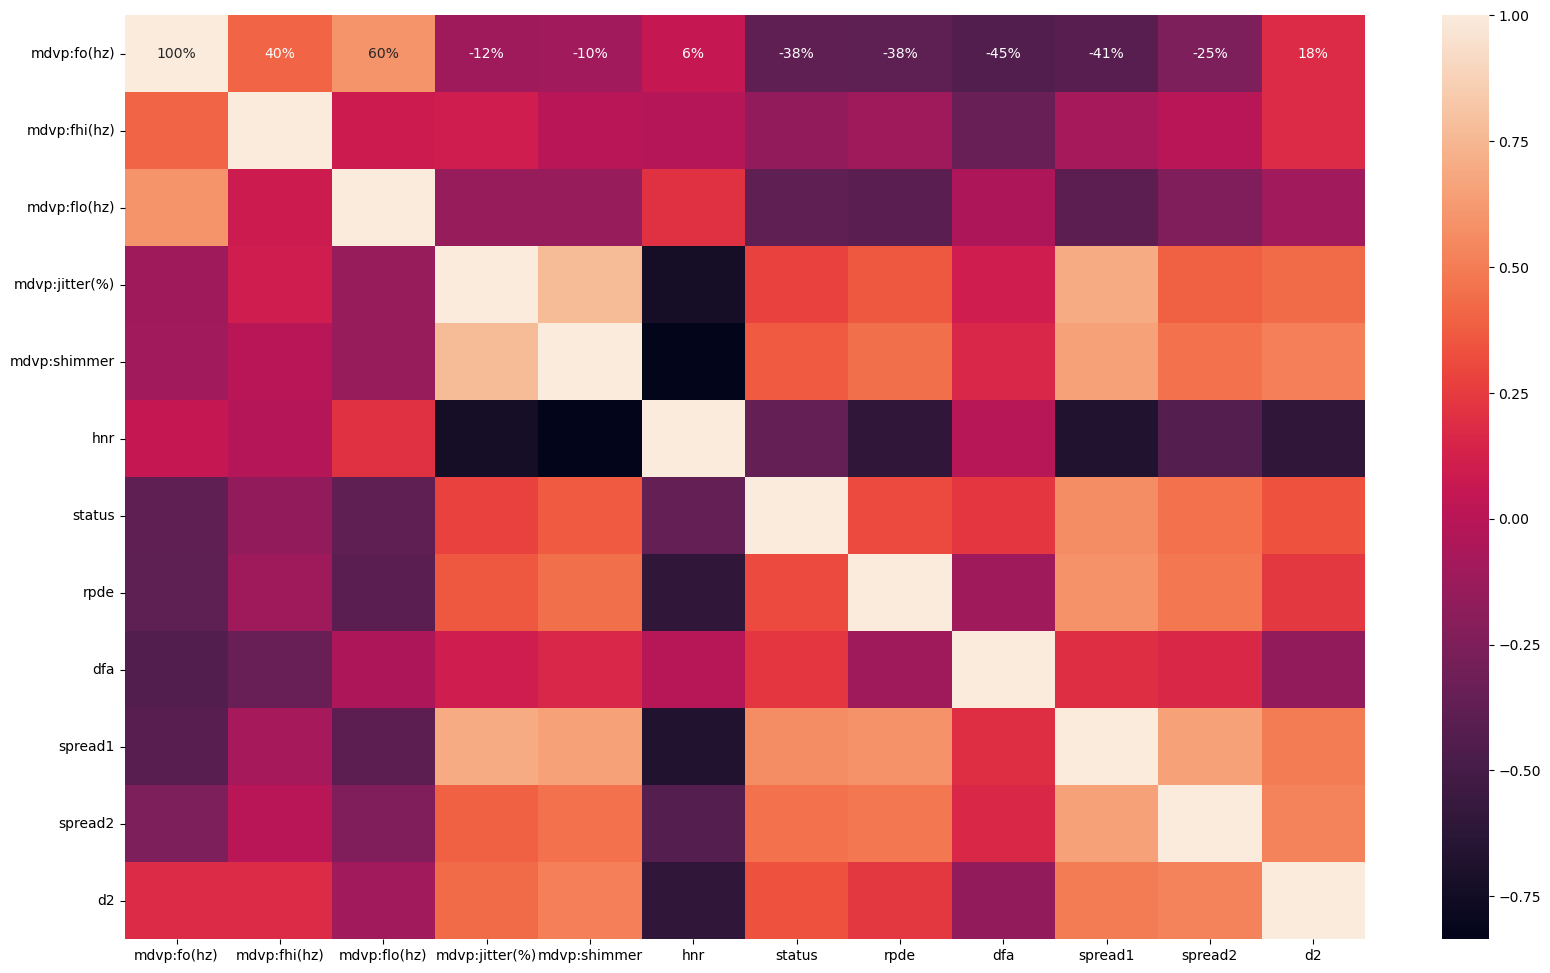

In [42]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

## Imbalance data

In [43]:
df["status"].unique()

array([1, 0], dtype=int64)

In [44]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [45]:
distribution = df['status'].value_counts(normalize=True) * 100
print(distribution)

status
1    75.384615
0    24.615385
Name: proportion, dtype: float64


In [46]:
df.head()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:shimmer,hnr,status,rpde,dfa,spread1,spread2,d2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [47]:
df.tail()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:shimmer,hnr,status,rpde,dfa,spread1,spread2,d2
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608
194,214.289,260.277,77.973,0.00567,0.01884,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477


## Train test split

In [48]:
x = df.drop(columns=["status"])
y = df["status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Smote

In [49]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Feature scaling

In [50]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Best Model Selection

### Logistic Regression

In [51]:
log = LogisticRegression()  


log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('Logitic Regression')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logitic Regression
Accuracy: 0.81
Train Accuracy: 0.8350
Test Accuracy: 0.8136

Confusion Matrix:
 [[11  4]
 [ 7 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.90      0.84      0.87        44

    accuracy                           0.81        59
   macro avg       0.76      0.79      0.77        59
weighted avg       0.83      0.81      0.82        59

AUC Score: 0.8970
Balanced Accuracy: 0.7871


In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1.         0.9        0.8        0.85       1.         0.68421053
 0.78947368 0.73684211 0.78947368 0.78947368]
Mean CV Accuracy: 0.8339473684210527


### Decision Tree Classifier

In [53]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=3)

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Accuracy: 0.92
Train Accuracy: 0.9417
Test Accuracy: 0.9153
Confusion Matrix:
 [[11  4]
 [ 1 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59

AUC Score: 0.9152
Balanced Accuracy: 0.8553


In [54]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.95       0.95       0.75       1.         1.         0.68421053
 0.42105263 0.57894737 1.         0.73684211]
Mean CV Accuracy: 0.8071052631578948


### Random Forest Classifier

In [55]:
rf = RandomForestClassifier(max_depth=10, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Accuracy: 0.90
Train Score: 1.0000
Test Score: 0.8983
Confusion Matrix:
 [[11  4]
 [ 2 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59

AUC-ROC Score: 0.9727
Balanced Accuracy: 0.8439


In [56]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9        1.         0.8        0.85       1.         0.89473684
 0.89473684 0.73684211 0.78947368 0.73684211]
Mean CV Accuracy: 0.8602631578947368


### SVC (Support Vector Classifier)

In [57]:
svc= SVC(kernel='rbf',C= 100,degree= 2,gamma='scale',probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = svc.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.90
Train Score: 1.0000
Test Score: 0.8983
Confusion Matrix:
 [[ 9  6]
 [ 0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59

AUC Score: 0.9667
Balanced Accuracy: 0.8000


In [58]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.85       0.95       0.8        0.85       1.         0.94736842
 0.89473684 0.73684211 0.78947368 0.73684211]
Mean CV Accuracy: 0.8555263157894737


## Manual Testing

In [59]:
input_data = (198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Parkinson Disease" if (prediction[0] == 0) else "The Person has Parkinson Disease")

[0]
The Person does not have Parkinson Disease


In [60]:
input_data = (122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Parkinson Disease" if (prediction[0] == 0) else "The Person has Parkinson Disease")

[0]
The Person does not have Parkinson Disease


In [61]:
input_data = (116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Parkinson Disease" if (prediction[0] == 0) else "The Person has Parkinson Disease")

[0]
The Person does not have Parkinson Disease


## Save the model

In [62]:
import pickle
with open('p_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

## Open and use it

In [63]:
with open("p_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [64]:
y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

[0]
